## Load Data

In [61]:
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.expand_frame_repr", False) 

In [47]:
df = pd.read_csv("https://raw.githubusercontent.com/nurfianqodar/skripsi/refs/heads/main/pengamatan.csv")
columns = pd.read_csv("https://raw.githubusercontent.com/nurfianqodar/skripsi/refs/heads/main/columns.csv")
legends = pd.read_csv("https://raw.githubusercontent.com/nurfianqodar/skripsi/refs/heads/main/legends.csv")

## Preview Data

### Sample Data

In [51]:
df.sample(5)

,tanggal,p,u,diameter_1,diameter_2,diameter_3,diameter_4
54,2025-08-09,B,4,18.6,19.4,18.8,19.6
3,2025-08-08,A,4,9.6,10.0,10.2,10.6
29,2025-08-08,F,5,8.3,8.5,9.1,8.6
8,2025-08-08,B,4,10.6,11.4,9.3,10.5
42,2025-08-09,B,2,24.1,25.3,26.0,22.6


### Columns Description

In [52]:
columns

,nama_kolom,keterangan
0,tanggal,Tanggal pengamatan
1,p,Perlakuan
2,u,Ulangan
3,diameter_1,Diameter isolat yang diukur lurus vertikal dengan arah huruf pada label
4,diameter_2,Diameter isolat yang diukur 45 derajat ke kanan dari diameter_1
5,diameter_3,Diameter isolat yang diukur 45 derajat ke kanan dari diameter_2
6,diameter_4,Diameter isolat yang diukur 45 derajat ke kanan dari diameter_3


### Legends

In [53]:
legends

,perlakuan,keterangan
0,A,Kontrol negatif (tanpa perlakuan)
1,B,Larutan ekstrak kulit nanas 50mg/mL
2,C,Larutan ekstrak kulit nanas 100mg/mL
3,D,Larutan ekstrak kulit nanas 200mg/mL
4,E,Larutan ekstrak kulit nanas 400mg/mL
5,F,Kontrol positif (fungisida kimia)


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tanggal     60 non-null     object 
 1   p           60 non-null     object 
 2   u           60 non-null     int64  
 3   diameter_1  60 non-null     float64
 4   diameter_2  60 non-null     float64
 5   diameter_3  60 non-null     float64
 6   diameter_4  60 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.4+ KB


## Cleaning Data

In [55]:
df_clean = df
df_clean["diameter_mm"] = df_clean[["diameter_1", "diameter_2", "diameter_3", "diameter_4",]].mean(axis=1)
df_clean["tanggal"] = pd.to_datetime(df_clean["tanggal"])
df.sample(5)

,tanggal,p,u,diameter_1,diameter_2,diameter_3,diameter_4,diameter_mm
36,2025-08-09,A,1,23.6,23.9,24.0,23.5,23.750
35,2025-08-09,F,1,19.6,18.1,23.3,22.9,20.975
4,2025-08-08,A,5,10.4,11.6,9.8,10.9,10.675
56,2025-08-09,D,4,24.6,25.5,25.9,28.5,26.125
26,2025-08-08,F,2,7.0,7.6,9.4,9.1,8.275


In [56]:
drop_cols = ["diameter_1", "diameter_2", "diameter_3", "diameter_4"]
df_clean = df_clean.drop(columns=drop_cols)
df_clean.sample(5)

,tanggal,p,u,diameter_mm
37,2025-08-09,A,4,27.250
15,2025-08-08,D,1,11.125
50,2025-08-09,F,3,17.875
2,2025-08-08,A,3,10.275
35,2025-08-09,F,1,20.975


## Ringkasan Statistik

In [63]:
from IPython.display import display, HTML
display(HTML(df_clean.drop(columns=["u"]).groupby(["tanggal", "p"]).describe().to_html()))

## Visualisasi

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Grafik Pertumbuhan

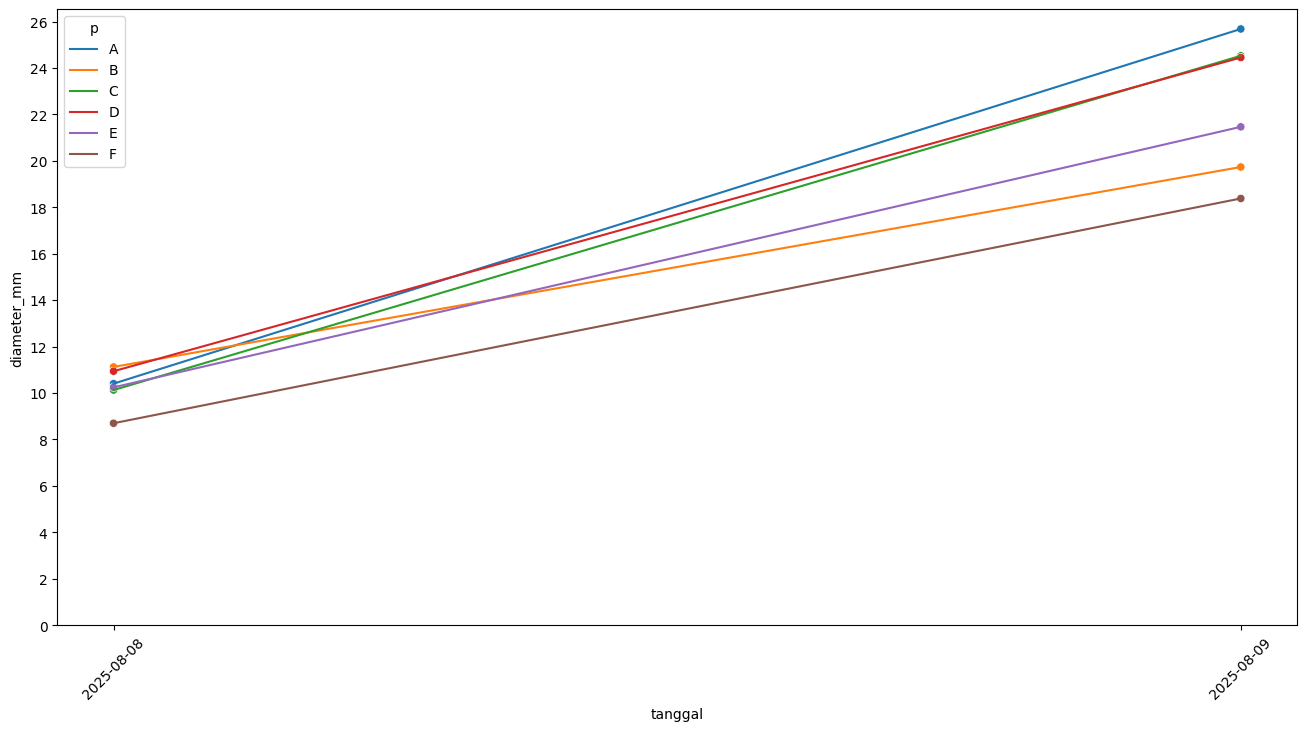

In [84]:
plt.figure(figsize=(16, 8,))

df_grouped = df_clean.groupby(by=["tanggal","p"]).agg({"diameter_mm": "mean"}).reset_index()

sns.lineplot(data=df_grouped,
             x="tanggal",
             y="diameter_mm",
             hue="p",
             errorbar=None)

sns.scatterplot(data=df_grouped,
             x="tanggal",
             y="diameter_mm",
             hue="p",
             legend=None)
plt.yticks(np.arange(0, df_clean.diameter_mm.max(axis=0), 2))
plt.xticks(df_clean.tanggal.unique(),rotation=45)
plt.show()